In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from tensorflow.keras.datasets import cifar10

In [7]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
x_test.shape

(10000, 32, 32, 3)

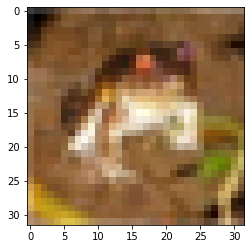

In [11]:
plt.imshow(x_train[0])# a frog

In [12]:
x_train.max()

255

In [13]:
x_train.min()

0

In [14]:
x_train = x_train/255
x_test = x_test/255

In [15]:
x_train.max()

1.0

In [16]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_cat_train = to_categorical(y_train,10) #10 is 10 classes
y_cat_test = to_categorical(y_test,10)

In [19]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [20]:
x_train.shape

(50000, 32, 32, 3)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [22]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

# model.add(Dense(1024,activation='relu'))

model.add(Dense(512,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [23]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               410112    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop= EarlyStopping(monitor='val_loss',patience=10)

In [26]:
model.fit(x_train,y_cat_train,epochs=200,batch_size=100,validation_data=(x_test,y_cat_test),callbacks=[early_stop],verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 47s 931us/sample - loss: 1.6462 - accuracy: 0.4080 - val_loss: 1.3155 - val_accuracy: 0.5368
Epoch 2/200
50000/50000 [==============================] - 46s 926us/sample - loss: 1.2786 - accuracy: 0.5489 - val_loss: 1.1417 - val_accuracy: 0.5947
Epoch 3/200
50000/50000 [==============================] - 47s 936us/sample - loss: 1.1003 - accuracy: 0.6145 - val_loss: 1.0505 - val_accuracy: 0.6326
Epoch 4/200
50000/50000 [==============================] - 46s 915us/sample - loss: 0.9694 - accuracy: 0.6621 - val_loss: 1.0060 - val_accuracy: 0.6557
Epoch 5/200
50000/50000 [==============================] - 44s 874us/sample - loss: 0.8648 - accuracy: 0.7006 - val_loss: 0.9628 - val_accuracy: 0.6734
Epoch 6/200
50000/50000 [==============================] - 44s 874us/sample - loss: 0.7699 - accuracy: 0.7337 - val_loss: 0.9390 - val_accuracy: 0.6858
Epoch 7/200
50000/50000 [=============

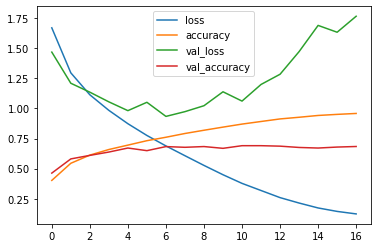

In [138]:
pd.DataFrame(model.history.history).plot()

In [1]:
predictions = model.predict_classes(x_test)

NameError: name 'model' is not defined

In [2]:
predictions

NameError: name 'predictions' is not defined

In [149]:
y_test[50]

array([9], dtype=uint8)

In [146]:
my_image = x_test[50]

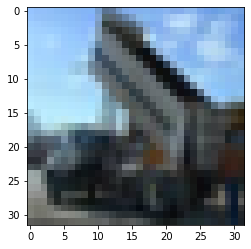

In [147]:
plt.imshow(my_image)

In [148]:
model.predict_classes(my_image.reshape(1,32,32,3))#1 image,32,32 height and width,3 color channel(RGB)

array([9], dtype=int64)

In [151]:
y_test[50]#Correct class was predicted

array([9], dtype=uint8)